# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.3.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Wind_data.csv')
df = pd. DataFrame(dataset)

In [4]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
y = y.reshape(len(y),1)

In [5]:
np.shape(X)


(3635, 112)

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = False)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)

## Part 2 - Building the ANN

### Initializing the ANN

In [8]:
input_dim = np.shape(X_train)[1]

# Initialising the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=64, input_dim=input_dim, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=32, input_dim=input_dim,activation='relu'))

# Adding the third hidden layer
ann.add(tf.keras.layers.Dense(units=16, input_dim=input_dim,activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [9]:
ann.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                7232      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


### Training the ANN on the Training set

In [10]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
91/91 [==============================] - 0s 740us/step - loss: 0.0990 - mae: 0.0990
Epoch 2/200
91/91 [==============================] - 0s 667us/step - loss: 0.0628 - mae: 0.0628
Epoch 3/200
91/91 [==============================] - 0s 676us/step - loss: 0.0584 - mae: 0.0584
Epoch 4/200
91/91 [==============================] - 0s 807us/step - loss: 0.0591 - mae: 0.0591
Epoch 5/200
91/91 [==============================] - 0s 792us/step - loss: 0.0558 - mae: 0.0558
Epoch 6/200
91/91 [==============================] - 0s 789us/step - loss: 0.0552 - mae: 0.0552
Epoch 7/200
91/91 [==============================] - 0s 730us/step - loss: 0.0542 - mae: 0.0542
Epoch 8/200
91/91 [==============================] - 0s 929us/step - loss: 0.0520 - mae: 0.0520
Epoch 9/200
91/91 [==============================] - 0s 832us/step - loss: 0.0523 - mae: 0.0523
Epoch 10/200
91/91 [==============================] - 0s 1ms/step - loss: 0.0507 - mae: 0.0507
Epoch 11/200
91/91 [=====================

### Predicting the Test set results

In [11]:
from sklearn.metrics import mean_absolute_error
y_predict = ann.predict(X_test)
y_predict = sc.inverse_transform(y_predict)
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 0.046


### Plotting the figure

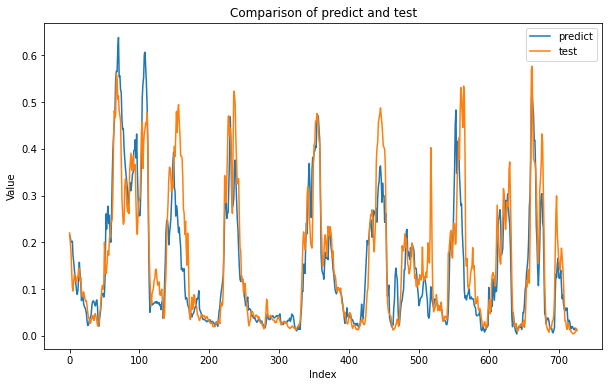

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_predict, label='predict')
plt.plot(y_test, label='test')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of predict and test')
plt.legend()

# Show the plot
plt.show()